In [93]:
import pandas as pd 
import numpy as np

In [94]:
path = r'D:\DATA MINING\archive\KaggleV2-May-2016.csv'
df = pd.read_csv(path, sep=',')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [96]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [97]:
df.drop(columns=['PatientId'], inplace=True)
df['No-show'] = df['No-show'].map({'Yes': True, 'No': False})

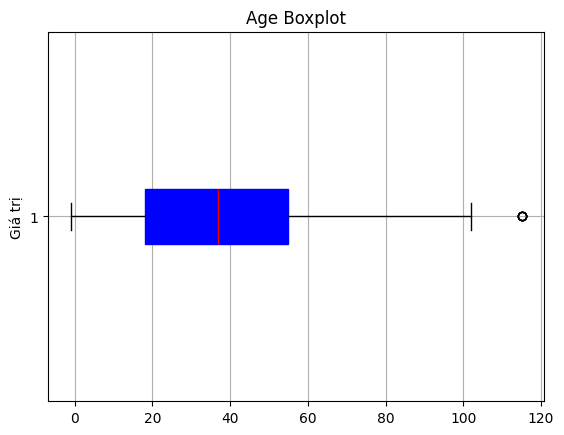

In [98]:
plt.boxplot(df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'), medianprops=dict(color='red'))
plt.title("Age Boxplot")
plt.ylabel("Giá trị")
plt.grid(True)
plt.show()

array([[<Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Scholarship'}>],
       [<Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Alcoholism'}>],
       [<Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMS_received'}>, <Axes: >]], dtype=object)

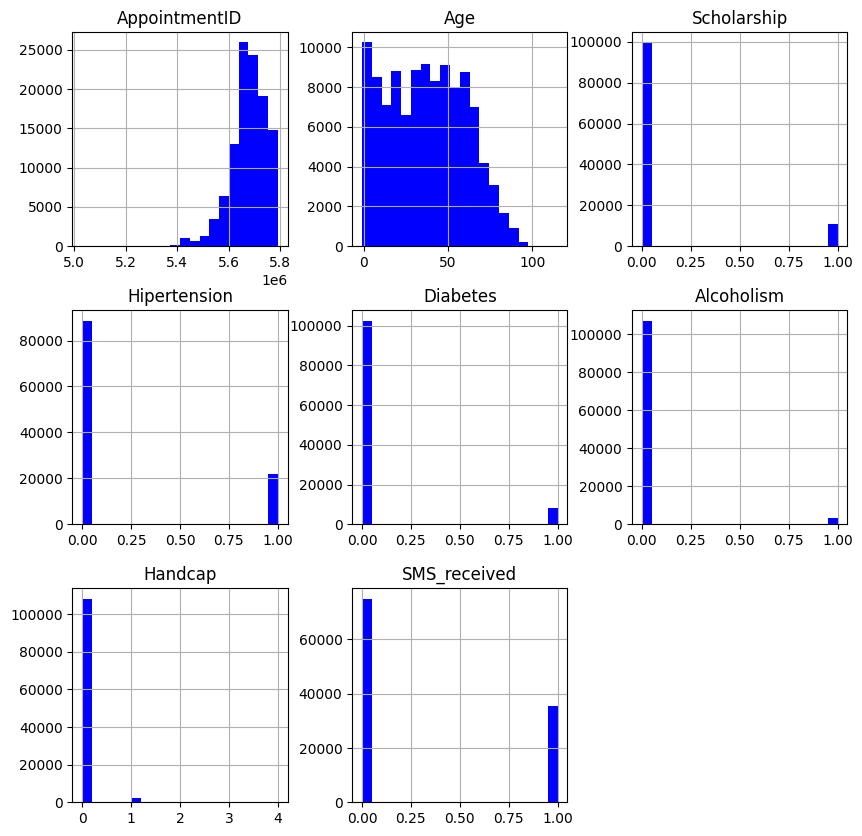

In [99]:
df.hist(bins=20, color='blue', alpha=1.0, figsize=(10, 10))

In [100]:
df = df[df['Age'] > 0]
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [101]:
print(df['AppointmentID'].duplicated().sum())


0


In [102]:
df.drop(columns=['AppointmentID'], inplace=True)

In [103]:
df['Num_Days_Between'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['Num_Days_Between'] = df['Num_Days_Between'].astype(int)
df = df[df['Num_Days_Between'] > 0]

In [104]:
df['Num_Days_Between'].describe()

count    64800.000000
mean        15.708164
std         16.615154
min          1.000000
25%          4.000000
50%         10.000000
75%         23.000000
max        178.000000
Name: Num_Days_Between, dtype: float64

In [105]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [106]:
df.loc[df['Handcap'] > 0, 'Handcap'] = 1

In [107]:
bool_data = ('Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received')
for col in bool_data:
    df[col] = df[col].astype(bool)

In [108]:
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Num_Days_Between
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,False,True,False,False,False,False,False,1
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,False,False,True,1
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,False,False,False,False,False,False,True,1
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,False,False,False,False,False,False,False,1
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,False,False,False,False,False,True,False,34
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,False,False,False,False,False,True,False,34
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,False,False,False,False,False,True,False,40
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,False,False,False,False,False,True,False,40
